In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('training data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.rename(columns={'ApplicantIncome': 'Applicant_Income', 'CoapplicantIncome': 'Coapplicant_Income', 'LoanAmount':'Loan_Amount'}, 
          inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.describe(include='object').drop('Loan_ID', axis=1)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


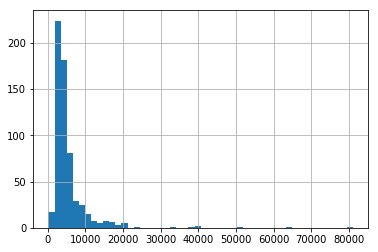

In [6]:
df.Applicant_Income.hist(bins=50)

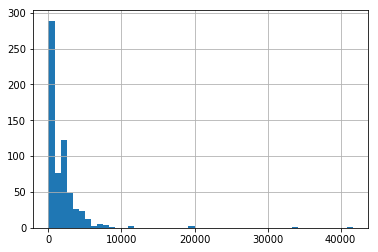

In [7]:
df.Coapplicant_Income.hist(bins=50)

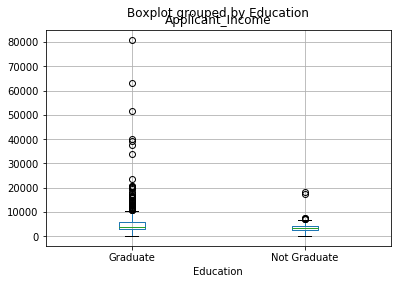

In [8]:
df.boxplot(column='Applicant_Income', by='Education')

In [9]:
temp1 = df.Credit_History.value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [10]:
temp2 = df.pivot_table(index='Credit_History', values='Loan_Status', aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [11]:
print('Frequency Table for Credit History:') 
print(temp1)
print()
print('Probility of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


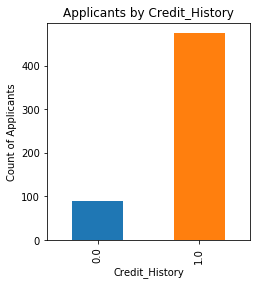

In [12]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit_History')
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan by credit history')

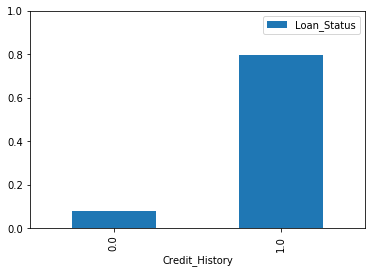

In [13]:
ax2 = fig.add_subplot(122)
temp2.plot(kind='bar', ylim=(0, 1))
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by credit history')

In [14]:
temp3 = pd.crosstab(index=df.Credit_History, columns=df.Loan_Status)
temp3

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


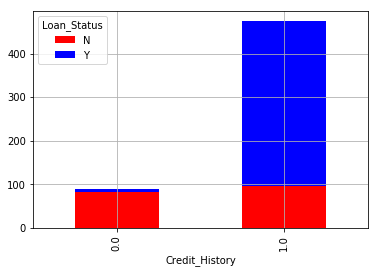

In [15]:
temp3.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=True)

In [16]:
temp4 = pd.crosstab(index=[df.Credit_History, df.Gender], columns=[df.Loan_Status])
temp4

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

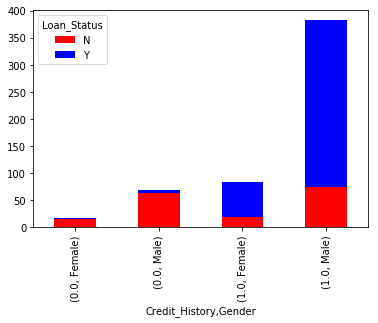

In [17]:
temp4.plot(kind='bar', stacked=True, color=['red', 'blue'])

In [18]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

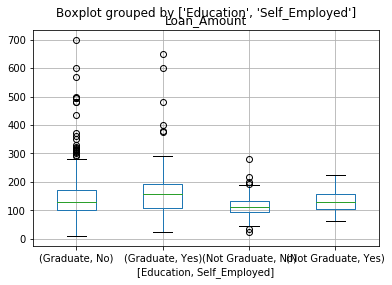

In [19]:
df.boxplot(column='Loan_Amount', by=['Education', 'Self_Employed'])

In [20]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [21]:
df.Self_Employed.fillna('No', inplace=True)
df.Self_Employed.value_counts(dropna=False)

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
temp4 = df.pivot_table(index='Self_Employed', columns='Education', values='Loan_Amount', aggfunc=np.median)
temp4

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [23]:
def lookup(x):
    return temp4.loc[x.Self_Employed,x.Education]

In [ ]:
df.Loan_Amount.fillna(df[df.Loan_Amount.isnull()].apply(lookup, axis=1), inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [25]:
df['Log_Loan_Amount'] = np.log(df.Loan_Amount)

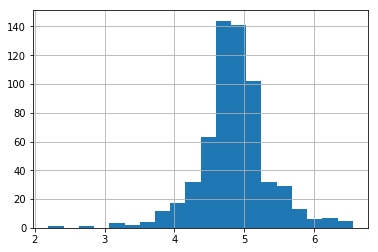

In [26]:
df.Log_Loan_Amount.hist(bins=20)

In [27]:
df['Total_Income'] = df.Applicant_Income + df.Coapplicant_Income

In [28]:
df.Total_Income.describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

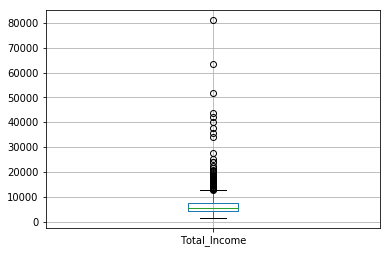

In [29]:
df.boxplot('Total_Income')

In [30]:
df['Log_Total_Income'] = np.log(df.Total_Income)

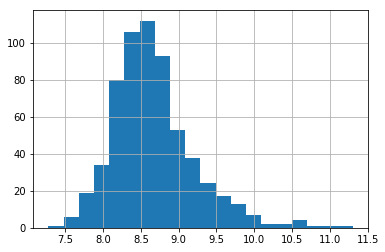

In [31]:
df.Log_Total_Income.hist(bins=20)

In [32]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_Loan_Amount,Total_Income,Log_Total_Income
count,614,601,611,599,614,614,614.000000,614.000000,614.000000,600.00000,564.000000,614,614,614.000000,614.000000,614.000000
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,LP002959,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,NaN,NaN,NaN
freq,1,489,398,345,480,532,NaN,NaN,NaN,NaN,NaN,233,422,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.764658,342.00000,0.842199,NaN,NaN,4.857146,7024.705081,8.669414
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.145700,65.12041,0.364878,NaN,NaN,0.496392,6458.663872,0.545102
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN,2.197225,1442.000000,7.273786
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.00000,1.000000,NaN,NaN,4.607658,4166.000000,8.334712
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN,4.852030,5416.500000,8.597205
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.00000,1.000000,NaN,NaN,5.104426,7521.750000,8.925549


In [33]:
df.Gender.fillna(df.Gender.mode()[0], inplace=True)

In [34]:
df.Married.fillna(df.Married.mode()[0], inplace=True)

In [35]:
df.Dependents.fillna(df.Dependents.mode()[0], inplace=True)

In [36]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0], inplace=True)

In [37]:
df.Credit_History.fillna(df.Credit_History.mode()[0], inplace=True)

In [38]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_Loan_Amount,Total_Income,Log_Total_Income
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614,614.000000,614.000000,614.000000
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,LP002959,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,NaN,NaN,NaN
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.764658,342.410423,0.855049,NaN,NaN,4.857146,7024.705081,8.669414
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.145700,64.428629,0.352339,NaN,NaN,0.496392,6458.663872,0.545102
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN,2.197225,1442.000000,7.273786
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN,4.607658,4166.000000,8.334712
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN,4.852030,5416.500000,8.597205
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN,5.104426,7521.750000,8.925549


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [49]:
Gender_Dict = {}
for i in range(len(le.classes_)):
    Gender_Dict[i] = le.classes_[i]
Gender_Dict

{0: 'Female', 1: 'Male'}

In [42]:
Dict = {}
var = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for v in var:
    df[v] = le.fit_transform(df[v])
    l = []
    for i in range(len(le.classes_)):
        l.append((i, le.classes_[i]))
    Dict[v] = l
Dict

{'Gender': [(0, 'Female'), (1, 'Male')],
 'Married': [(0, 'No'), (1, 'Yes')],
 'Dependents': [(0, '0'), (1, '1'), (2, '2'), (3, '3+')],
 'Education': [(0, 'Graduate'), (1, 'Not Graduate')],
 'Self_Employed': [(0, 'No'), (1, 'Yes')],
 'Property_Area': [(0, 'Rural'), (1, 'Semiurban'), (2, 'Urban')],
 'Loan_Status': [(0, 'N'), (1, 'Y')]}

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_Loan_Amount,Total_Income,Log_Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,4.867534,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [45]:
df.dtypes

Loan_ID                object
Gender                  int32
Married                 int32
Dependents              int32
Education               int32
Self_Employed           int32
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area           int32
Loan_Status             int32
Log_Loan_Amount       float64
Total_Income          float64
Log_Total_Income      float64
dtype: object

In [86]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    score = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        score.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(score)))
    print(score)

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [87]:
outcome_var = 'Loan_Status'
LR = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(LR, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%
[0.8048780487804879, 0.7642276422764228, 0.8048780487804879, 0.8536585365853658, 0.819672131147541]


C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [88]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(LR, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%
[0.8048780487804879, 0.7642276422764228, 0.8048780487804879, 0.8536585365853658, 0.819672131147541]


C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nelson Chung\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [89]:
DT = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(DT, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%
[0.8048780487804879, 0.7642276422764228, 0.8048780487804879, 0.8536585365853658, 0.819672131147541]


In [93]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','Log_Loan_Amount']
classification_model(DT, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.208%
[0.7398373983739838, 0.6910569105691057, 0.6910569105691057, 0.7073170731707317, 0.6311475409836066]


In [96]:
RF = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'Log_Loan_Amount','Log_Total_Income']
classification_model(RF, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.341%
[0.7560975609756098, 0.7317073170731707, 0.8130081300813008, 0.8211382113821138, 0.7950819672131147]
